## Process for Cleaning Outlier Data

Starting from a series of data $(x, y)$, perform the following process to clean outlier data:

1. Apply the Savitzky–Golay filter (`savgol_filter`) to smooth the dependent variable $Y$.
2. Analyze the data series. Values of $Y$ whose distance from the corresponding value (with the same $X$ value) on the smoothed curve is greater than the standard deviation multiplied by a certain factor (e.g., 0.5) are considered outliers and are removed from the data series.
3. Generate a figure with the original data series, the smoothed curve, the filtered data series, and the outliers.

**Note**: The tolerance factor for detecting outliers can be adjusted depending on the nature of the data and the required level of smoothing.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import matplotlib.patches as patches


In [2]:
#Indicate the input file name
file_name='bielenteraabajoarriba_columna-C.csv'

#Indicate the parameters for the savgol_filter
window_length=7
polyorder=1

#Indicate the factor to multiply for the standard deviation
factor=0.5

#Indicate the limits for the x and y axes for the inset in the figure
x_min=1500
x_max=2000
y_min=-10
y_max=10

In [3]:
#Get the data
data = pd.read_csv(file_name)
data_np =data.to_numpy()
y=data_np[:,1]

#Apply smoothing using the savgol_filter
y_smooth=savgol_filter(y, window_length=window_length, polyorder=polyorder)

#Calculate the standart deviation
std=np.std(y)

data.insert(2, 'smooth', y_smooth)
data

#Evaluate the data, identify outliers, and clean the data series.
data_fil=data[abs(abs(data['data'])-abs(data['smooth']))<(std*factor)]
outliers=data[abs(abs(data['data'])-abs(data['smooth']))>(std*factor)]

#Save the cleaned data
data_fil.to_csv(file_name[:-4]+'_filtrado_std*'+str(factor)+'.csv')
data.to_csv(file_name[:-4]+'_smooth.csv')


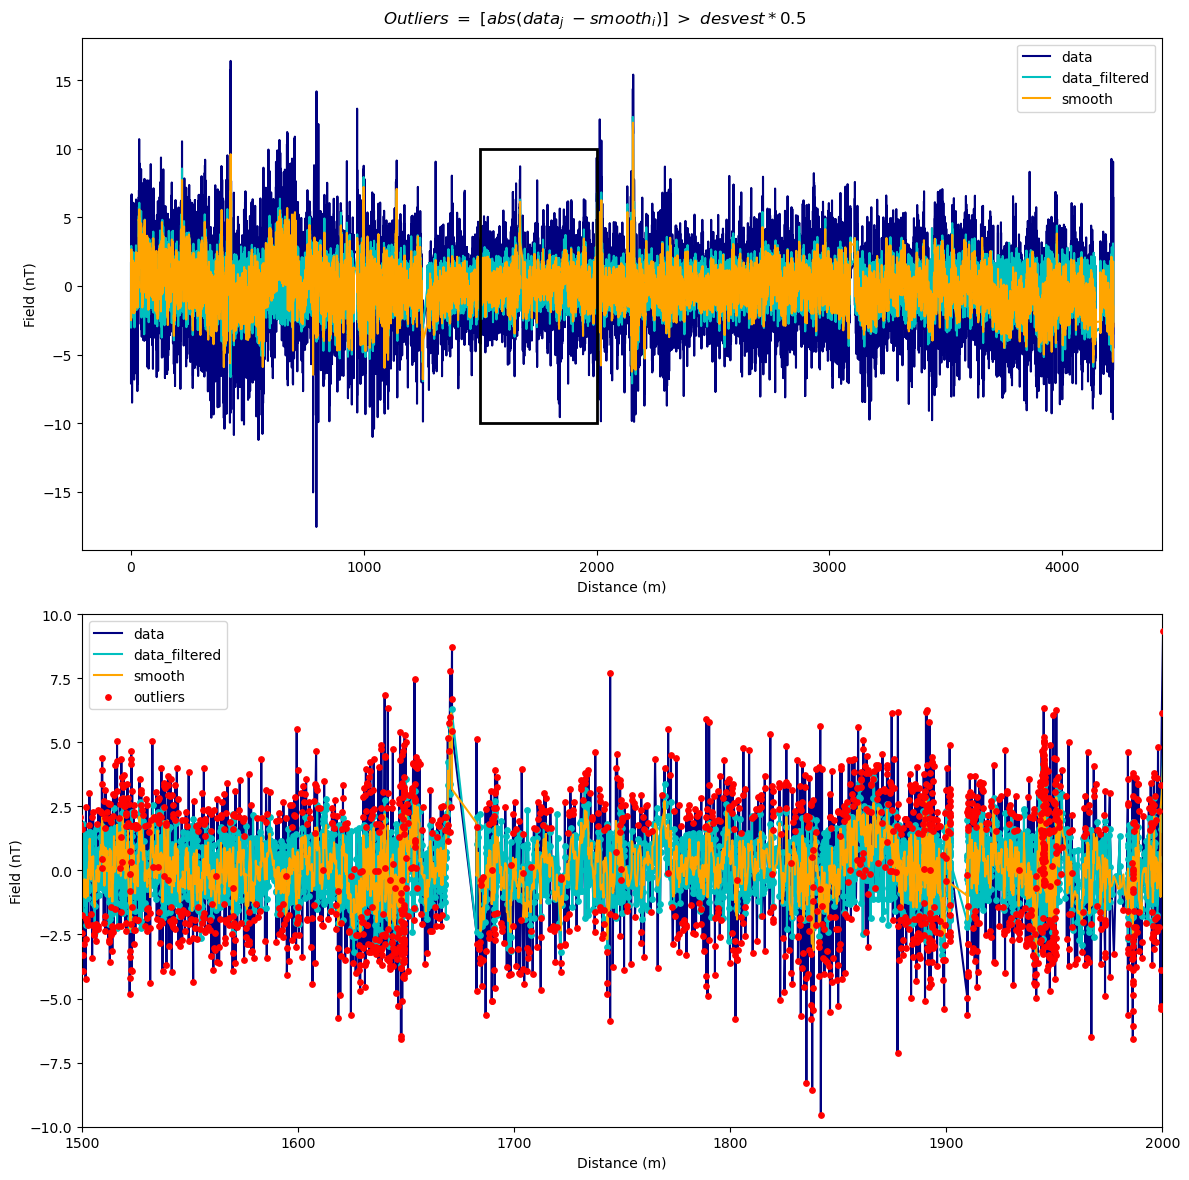

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12), sharey=False, sharex=False)
fig.suptitle('$Outliers\ =\ [abs(data_{j}\ - smooth_{i})]\ >\ desvest*$'+str(factor))

ax1.plot(data['dist'], data['data'], label='data',zorder=2, c='navy')
ax1.plot(data_fil['dist'], data_fil['data'], label='data_filtered', zorder=2, c='c')
#ax1.scatter(data_fil['dist'], data_fil['data'], zorder=2, c='c', s=15)
ax1.plot(data['dist'], data['smooth'], label='smooth',zorder=2, c='orange')
#ax1.scatter(outliers['dist'], outliers['data'], label='outliers', c='r', zorder=3, s=15)
ax1.legend()
square = patches.Rectangle((x_min, y_min), x_max-x_min, y_max-y_min, edgecolor='k', facecolor='none', zorder=3, linewidth=2)
ax1.add_patch(square)

ax2.plot(data['dist'], data['data'], label='data',zorder=2, c='navy')
ax2.plot(data_fil['dist'], data_fil['data'], label='data_filtered', zorder=2, c='c')
ax2.scatter(data_fil['dist'], data_fil['data'], zorder=2, c='c', s=15)
ax2.plot(data['dist'], data['smooth'], label='smooth',zorder=2, c='orange')
ax2.scatter(outliers['dist'], outliers['data'], label='outliers', c='r', zorder=3, s=15)
ax2.legend()

ax2.set_xlim((x_min, x_max))
ax2.set_ylim((y_min, y_max))
ax1.set_xlabel('Distance (m)')
ax2.set_xlabel('Distance (m)')
ax1.set_ylabel('Field (nT)')
ax2.set_ylabel('Field (nT)')

plt.tight_layout()
plt.savefig(file_name[:-4]+'_filtrado_std*'+str(factor)+'.png')
plt.savefig(file_name[:-4]+'_filtrado_std*'+str(factor)+'.svg')